In [1]:
using AutomotiveDrivingModels
using AutoViz
using Interact

In [30]:
seed = 1
input_filepath = "../../data/trajdatas/$(seed).txt"
veh_filepath = "../../data/trajdatas/seeds_veh_idxs.csv"
infile = open(input_filepath, "r")
trajdata = read(infile, Trajdata);
veh_idxs = readtable(veh_filepath)
veh_idxs = veh_idxs[veh_idxs[:seed] .== seed, :][:vehicle_index]
roadway = gen_stadium_roadway(5, length=400., radius=100.);

Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(25, nactions=1),"frame",25,"25",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(2=>"2",11=>"11",39=>"39",46=>"46",25=>"25",42=>"42",29=>"29",8=>"8",20=>"20",14=>"14"…)),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(19, nactions=1),"veh_idx",19,"19",Interact.OptionDict(DataStructures.OrderedDict("19"=>19,"122"=>122,"124"=>124,"196"=>196),Dict(124=>"124",122=>"122",19=>"19",196=>"196")),Any[],Any[],true,"horizontal")

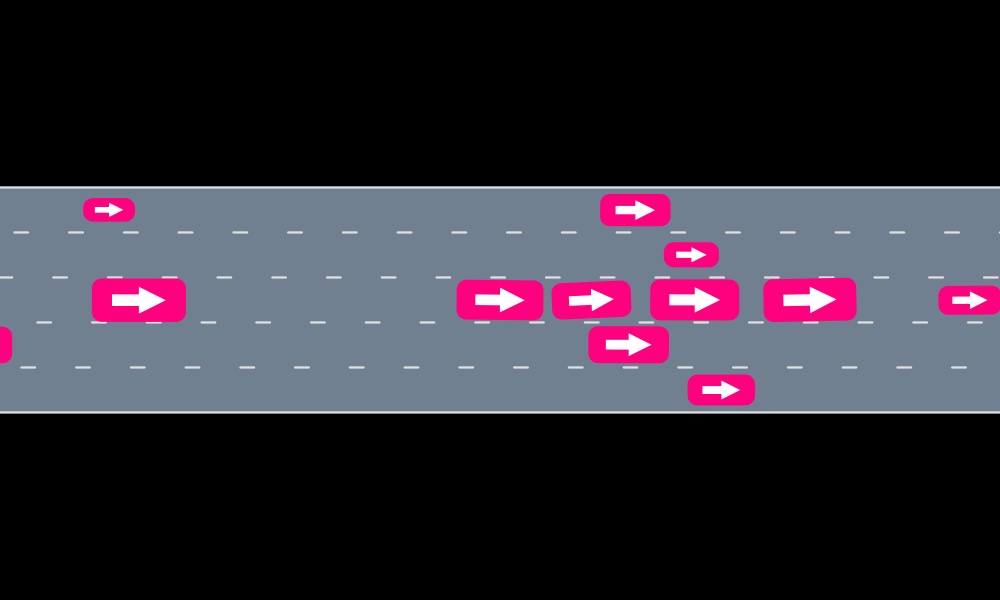

In [31]:
scene = Scene()
@manipulate for frame in 1:nframes(trajdata),
                veh_idx in veh_idxs
    render(get!(scene, trajdata, frame), roadway, cam = CarFollowCamera(veh_idx, 15.))
end